In [1]:
# LOD, dx
import numpy as np
from numpy import fft
from scipy import signal
import os
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
os.chdir(r'C:\a_sem_i\PiPG_I\temat_9')

In [2]:
import re
def my_replace(s,character=', '):
    '''Replace all runs of whitespace with a single dash'''
    
    s = re.sub("\s+", character, s)
    return s

def readfile(input_path,value_starts,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            wart = my_replace(line).split(', ')
            if wart[0] == value_starts:
                w.writelines(wart+['\n'])

In [3]:
def readfile(input_path,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            line = line[7:]
            wart = my_replace(line).split(',')
            k = 0
            for i in wart:
                if i.startswith(' I'):
                    i = i[2:]
                    wart[k] = ' ' + i
                k += 1
            w.writelines(wart+['\n'])

In [4]:
readfile('finals.data.iau2000.txt', 'out_data2.txt')

In [5]:
lod2, dx2 = np.loadtxt('out_data2.txt', usecols=(10,12), unpack=True)

In [6]:
def readfile2(input_path,value_to_change,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            wart = my_replace(line).split(',')
            if wart[0] == '':
                wart.remove('')
            k = 0
            for i in wart:
                if i.startswith(' I'):
                    i = i[2:]
                    wart[k] = ' ' + i
                k += 1
            if len(wart[0]) == 4:
                wart.insert(0, ' ' + wart[0][:2])
                wart.insert(1, ' ' + wart[1][2:])
                wart.pop(2)
                
            elif len(wart[0]) == 6:
                wart.insert(0, ' ' + wart[0][:2])
                wart.insert(1, ' ' + wart[1][2:4])
                wart.insert(2, ' ' + wart[2][4:])
                wart.pop(3)

            if len(wart[1]) > 3 and len(wart[1]) < 6:
                wart.insert(1, ' ' + wart[1][1])
                wart[2] = ' ' + wart[2][2:]
                
            if wart[0][0] == '9':
                wart[0]= '19' + wart[0]
            elif wart[0][0] == ' ':
                wart[0] = '200'+wart[0][-1]
            else:
                wart[0] = '20' + wart[0][0:2]
            if len(wart[1]) == 2:
                wart[1] = ' 0' + wart[1][-1]
            if len(wart[2]) == 2:
                wart[2] = ' 0' + wart[2][-1]
            w.writelines(wart+['\n'])

In [7]:
readfile2('finals.data.iau2000.txt', 'I', 'out_data.txt')

In [9]:
date = np.loadtxt('out_data.txt', usecols=(0,1,2), dtype = str)
# ''.join(date)
# date = np.datetime64(date)
# print(date)

# for b,c,d in zip(b,c,d):
#     date = np.datetime64(f'{b}-{c}-{d}')
#     print(date)

In [33]:
from dateutil.parser import parse
for day in date:
    day_parse = parse(' '.join(day))
    print(day_parse)

1992-01-01 00:00:00
1992-01-02 00:00:00
1992-01-03 00:00:00
1992-01-04 00:00:00
1992-01-05 00:00:00
1992-01-06 00:00:00
1992-01-07 00:00:00
1992-01-08 00:00:00
1992-01-09 00:00:00
1992-01-10 00:00:00
1992-01-11 00:00:00
1992-01-12 00:00:00
1992-01-13 00:00:00
1992-01-14 00:00:00
1992-01-15 00:00:00
1992-01-16 00:00:00
1992-01-17 00:00:00
1992-01-18 00:00:00
1992-01-19 00:00:00
1992-01-20 00:00:00
1992-01-21 00:00:00
1992-01-22 00:00:00
1992-01-23 00:00:00
1992-01-24 00:00:00
1992-01-25 00:00:00
1992-01-26 00:00:00
1992-01-27 00:00:00
1992-01-28 00:00:00
1992-01-29 00:00:00
1992-01-30 00:00:00
1992-01-31 00:00:00
1992-02-01 00:00:00
1992-02-02 00:00:00
1992-02-03 00:00:00
1992-02-04 00:00:00
1992-02-05 00:00:00
1992-02-06 00:00:00
1992-02-07 00:00:00
1992-02-08 00:00:00
1992-02-09 00:00:00
1992-02-10 00:00:00
1992-02-11 00:00:00
1992-02-12 00:00:00
1992-02-13 00:00:00
1992-02-14 00:00:00
1992-02-15 00:00:00
1992-02-16 00:00:00
1992-02-17 00:00:00
1992-02-18 00:00:00
1992-02-19 00:00:00


1998-01-10 00:00:00
1998-01-11 00:00:00
1998-01-12 00:00:00
1998-01-13 00:00:00
1998-01-14 00:00:00
1998-01-15 00:00:00
1998-01-16 00:00:00
1998-01-17 00:00:00
1998-01-18 00:00:00
1998-01-19 00:00:00
1998-01-20 00:00:00
1998-01-21 00:00:00
1998-01-22 00:00:00
1998-01-23 00:00:00
1998-01-24 00:00:00
1998-01-25 00:00:00
1998-01-26 00:00:00
1998-01-27 00:00:00
1998-01-28 00:00:00
1998-01-29 00:00:00
1998-01-30 00:00:00
1998-01-31 00:00:00
1998-02-01 00:00:00
1998-02-02 00:00:00
1998-02-03 00:00:00
1998-02-04 00:00:00
1998-02-05 00:00:00
1998-02-06 00:00:00
1998-02-07 00:00:00
1998-02-08 00:00:00
1998-02-09 00:00:00
1998-02-10 00:00:00
1998-02-11 00:00:00
1998-02-12 00:00:00
1998-02-13 00:00:00
1998-02-14 00:00:00
1998-02-15 00:00:00
1998-02-16 00:00:00
1998-02-17 00:00:00
1998-02-18 00:00:00
1998-02-19 00:00:00
1998-02-20 00:00:00
1998-02-21 00:00:00
1998-02-22 00:00:00
1998-02-23 00:00:00
1998-02-24 00:00:00
1998-02-25 00:00:00
1998-02-26 00:00:00
1998-02-27 00:00:00
1998-02-28 00:00:00


2003-07-03 00:00:00
2003-07-04 00:00:00
2003-07-05 00:00:00
2003-07-06 00:00:00
2003-07-07 00:00:00
2003-07-08 00:00:00
2003-07-09 00:00:00
2003-07-10 00:00:00
2003-07-11 00:00:00
2003-07-12 00:00:00
2003-07-13 00:00:00
2003-07-14 00:00:00
2003-07-15 00:00:00
2003-07-16 00:00:00
2003-07-17 00:00:00
2003-07-18 00:00:00
2003-07-19 00:00:00
2003-07-20 00:00:00
2003-07-21 00:00:00
2003-07-22 00:00:00
2003-07-23 00:00:00
2003-07-24 00:00:00
2003-07-25 00:00:00
2003-07-26 00:00:00
2003-07-27 00:00:00
2003-07-28 00:00:00
2003-07-29 00:00:00
2003-07-30 00:00:00
2003-07-31 00:00:00
2003-08-01 00:00:00
2003-08-02 00:00:00
2003-08-03 00:00:00
2003-08-04 00:00:00
2003-08-05 00:00:00
2003-08-06 00:00:00
2003-08-07 00:00:00
2003-08-08 00:00:00
2003-08-09 00:00:00
2003-08-10 00:00:00
2003-08-11 00:00:00
2003-08-12 00:00:00
2003-08-13 00:00:00
2003-08-14 00:00:00
2003-08-15 00:00:00
2003-08-16 00:00:00
2003-08-17 00:00:00
2003-08-18 00:00:00
2003-08-19 00:00:00
2003-08-20 00:00:00
2003-08-21 00:00:00


2008-12-22 00:00:00
2008-12-23 00:00:00
2008-12-24 00:00:00
2008-12-25 00:00:00
2008-12-26 00:00:00
2008-12-27 00:00:00
2008-12-28 00:00:00
2008-12-29 00:00:00
2008-12-30 00:00:00
2008-12-31 00:00:00
2009-01-01 00:00:00
2009-01-02 00:00:00
2009-01-03 00:00:00
2009-01-04 00:00:00
2009-01-05 00:00:00
2009-01-06 00:00:00
2009-01-07 00:00:00
2009-01-08 00:00:00
2009-01-09 00:00:00
2009-01-10 00:00:00
2009-01-11 00:00:00
2009-01-12 00:00:00
2009-01-13 00:00:00
2009-01-14 00:00:00
2009-01-15 00:00:00
2009-01-16 00:00:00
2009-01-17 00:00:00
2009-01-18 00:00:00
2009-01-19 00:00:00
2009-01-20 00:00:00
2009-01-21 00:00:00
2009-01-22 00:00:00
2009-01-23 00:00:00
2009-01-24 00:00:00
2009-01-25 00:00:00
2009-01-26 00:00:00
2009-01-27 00:00:00
2009-01-28 00:00:00
2009-01-29 00:00:00
2009-01-30 00:00:00
2009-01-31 00:00:00
2009-02-01 00:00:00
2009-02-02 00:00:00
2009-02-03 00:00:00
2009-02-04 00:00:00
2009-02-05 00:00:00
2009-02-06 00:00:00
2009-02-07 00:00:00
2009-02-08 00:00:00
2009-02-09 00:00:00


2014-07-10 00:00:00
2014-07-11 00:00:00
2014-07-12 00:00:00
2014-07-13 00:00:00
2014-07-14 00:00:00
2014-07-15 00:00:00
2014-07-16 00:00:00
2014-07-17 00:00:00
2014-07-18 00:00:00
2014-07-19 00:00:00
2014-07-20 00:00:00
2014-07-21 00:00:00
2014-07-22 00:00:00
2014-07-23 00:00:00
2014-07-24 00:00:00
2014-07-25 00:00:00
2014-07-26 00:00:00
2014-07-27 00:00:00
2014-07-28 00:00:00
2014-07-29 00:00:00
2014-07-30 00:00:00
2014-07-31 00:00:00
2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
2014-08-04 00:00:00
2014-08-05 00:00:00
2014-08-06 00:00:00
2014-08-07 00:00:00
2014-08-08 00:00:00
2014-08-09 00:00:00
2014-08-10 00:00:00
2014-08-11 00:00:00
2014-08-12 00:00:00
2014-08-13 00:00:00
2014-08-14 00:00:00
2014-08-15 00:00:00
2014-08-16 00:00:00
2014-08-17 00:00:00
2014-08-18 00:00:00
2014-08-19 00:00:00
2014-08-20 00:00:00
2014-08-21 00:00:00
2014-08-22 00:00:00
2014-08-23 00:00:00
2014-08-24 00:00:00
2014-08-25 00:00:00
2014-08-26 00:00:00
2014-08-27 00:00:00
2014-08-28 00:00:00


2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-21 00:00:00
2020-03-22 00:00:00
2020-03-23 00:00:00
2020-03-24 00:00:00
2020-03-25 00:00:00
2020-03-26 00:00:00
2020-03-27 00:00:00
2020-03-28 00:00:00
2020-03-29 00:00:00
2020-03-30 00:00:00
2020-03-31 00:00:00
2020-04-01 00:00:00
2020-04-02 00:00:00
2020-04-03 00:00:00
2020-04-04 00:00:00
2020-04-05 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00


In [10]:
from datetime import datetime, timedelta

t = np.arange(datetime(1992,1,1), datetime(2021,4,2), timedelta(days=1)).astype(datetime)
t.shape

(10684,)

In [11]:
lod, dx = np.loadtxt('out_data.txt', usecols=(10,12), unpack=True)
lod.shape, dx.shape

((10684,), (10684,))

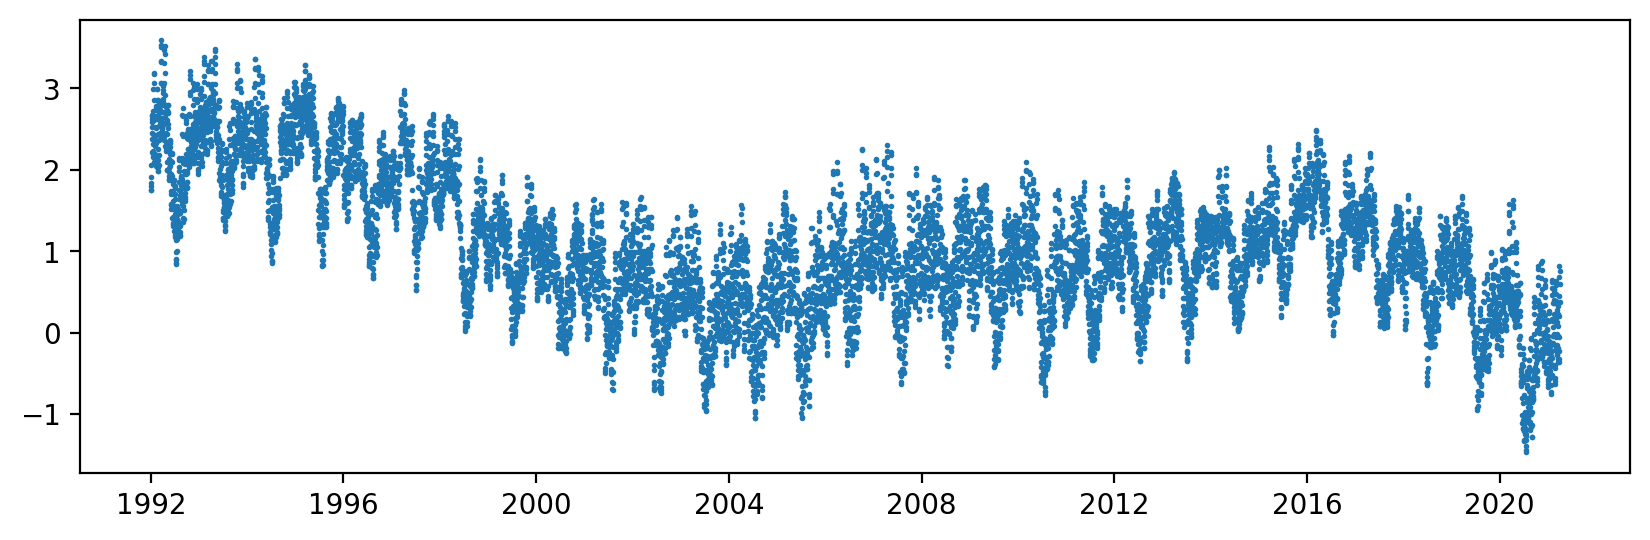

In [12]:
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t,lod, s = 1)

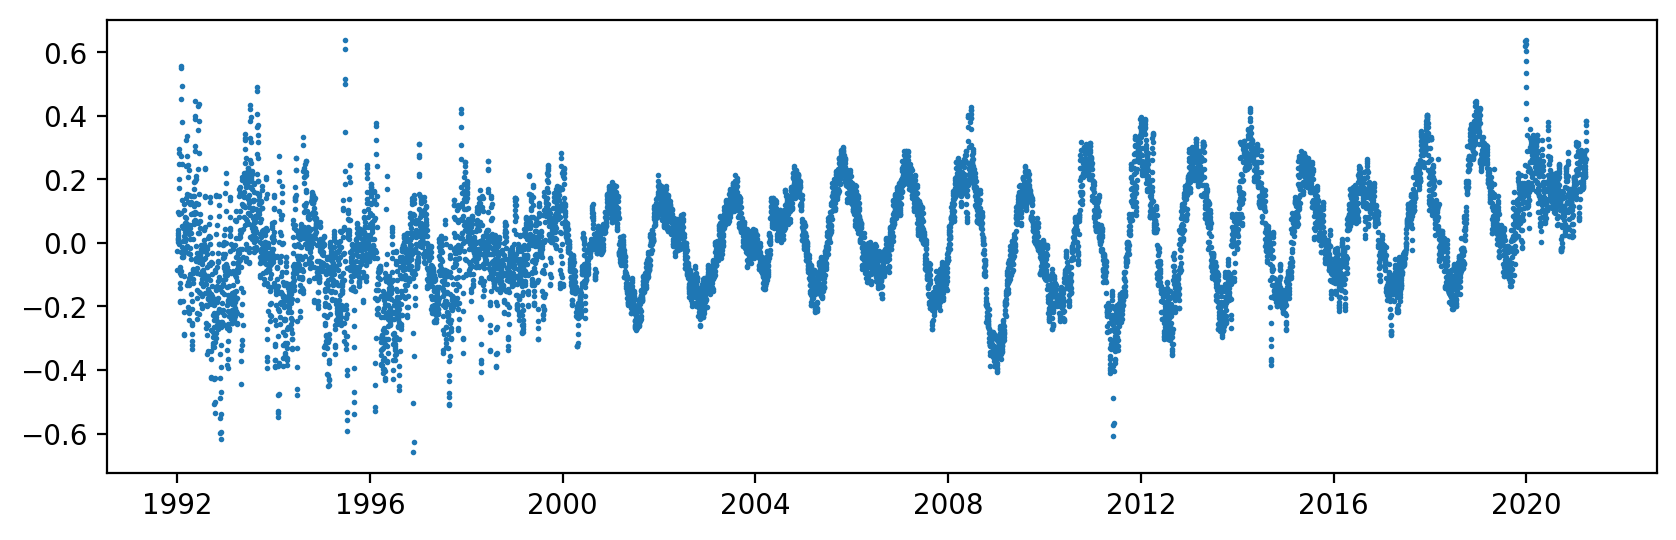

In [13]:
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t,dx, s=1)

In [14]:
model = LinearRegression()
x = np.arange(1,len(t)+1).reshape(-1, 1)
y = lod

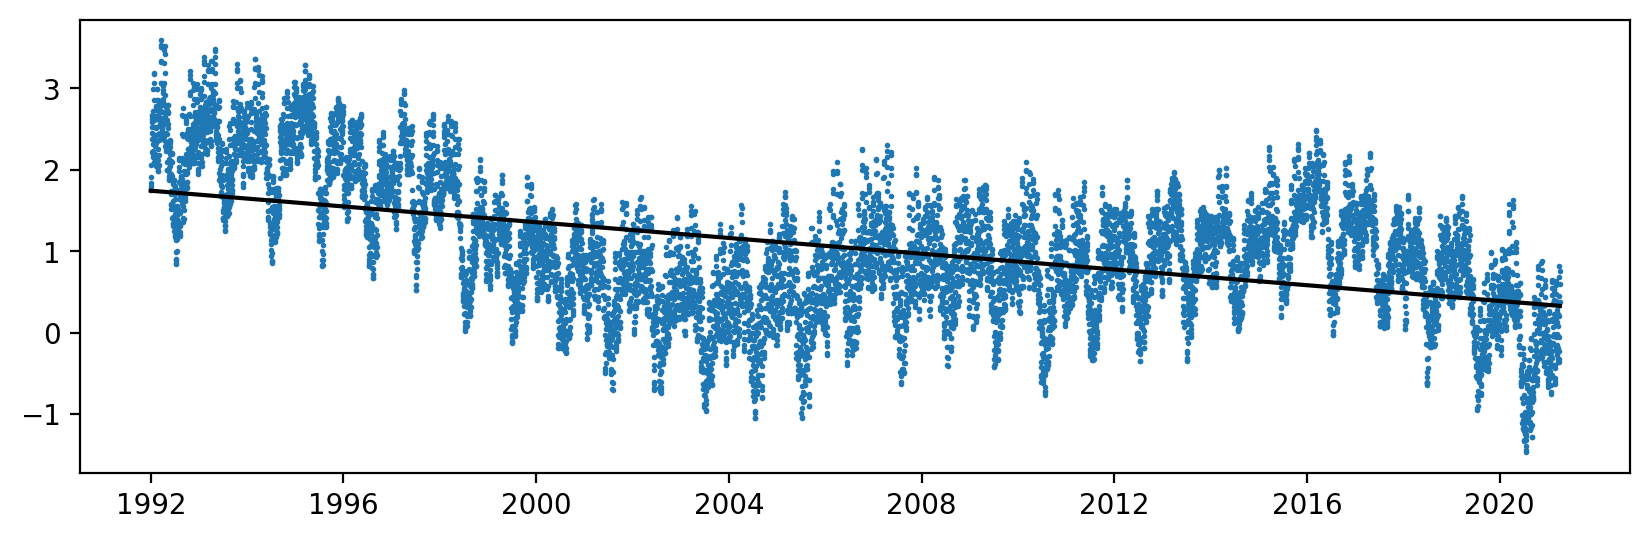

In [15]:
model.fit(x,y)
y_predict = model.predict(x)
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t,lod, s=1)
plt.plot(t, y_predict, '-k')

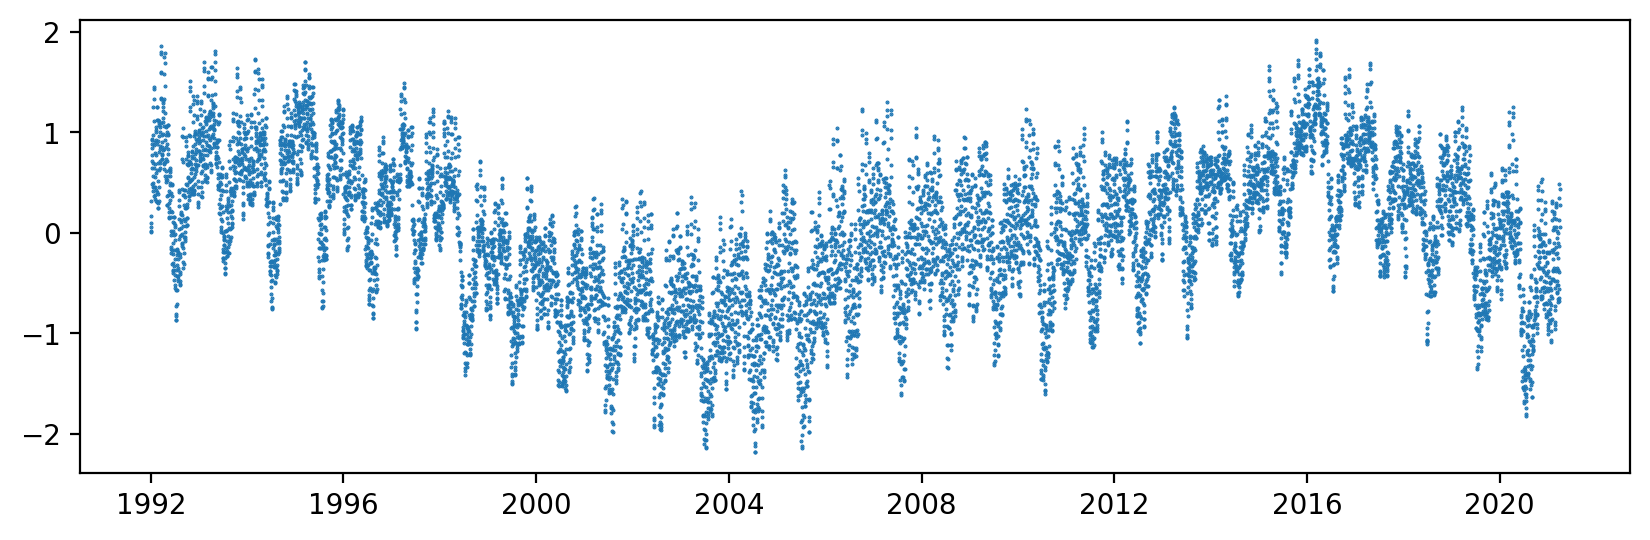

In [16]:
value = (y - y_predict)
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t, value, s = 0.2)
#plt.hlines(0, colors = 'k',lw = 1)

[   1    3    6   10   12   16   18   21   24   29   34   36   39   41
   43   46   49   52   54   58   62   66   88   95  114  117  121  129
  134  142  146  154  170  180  201  212  317  336  388  724  782  784
 1170 1172]


(0.01, 0.12)

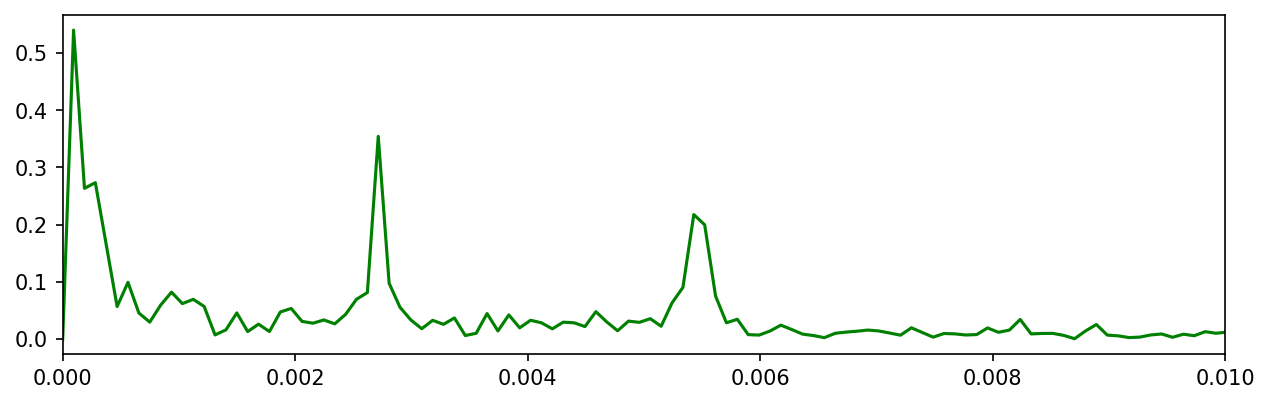

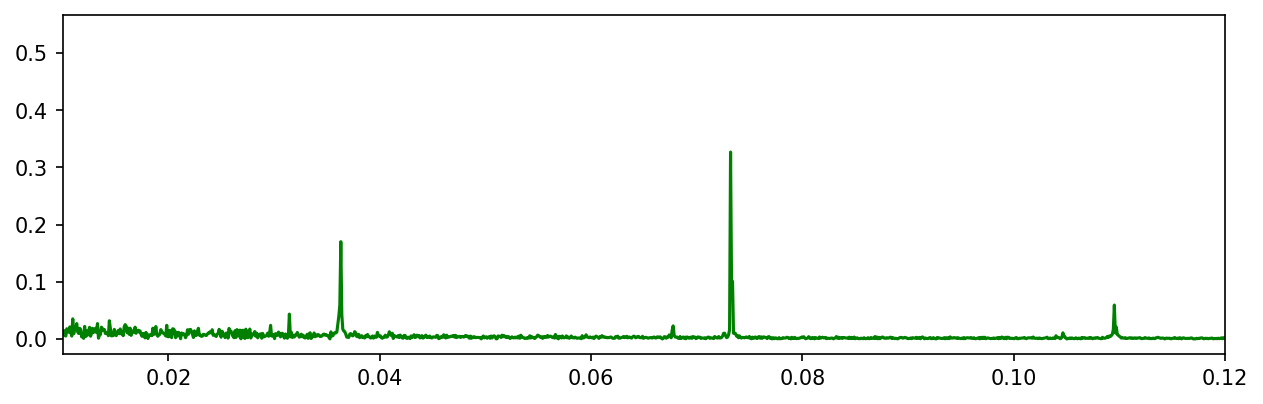

In [17]:
samples = len(y)
dt = 1 #day
f_trans = 2*abs(fft.rfft(value, axis = 0)) / samples
freq = fft.rfftfreq(len(value), dt)
print(signal.find_peaks(f_trans,0.02)[0])

fig = plt.figure(figsize=(10,3), dpi=150)
plt.plot(freq, f_trans, 'g')
plt.xlim(0, 0.01)

fig = plt.figure(figsize=(10,3), dpi=150)
plt.plot(freq, f_trans, 'g')
plt.xlim(0.01, 0.12)

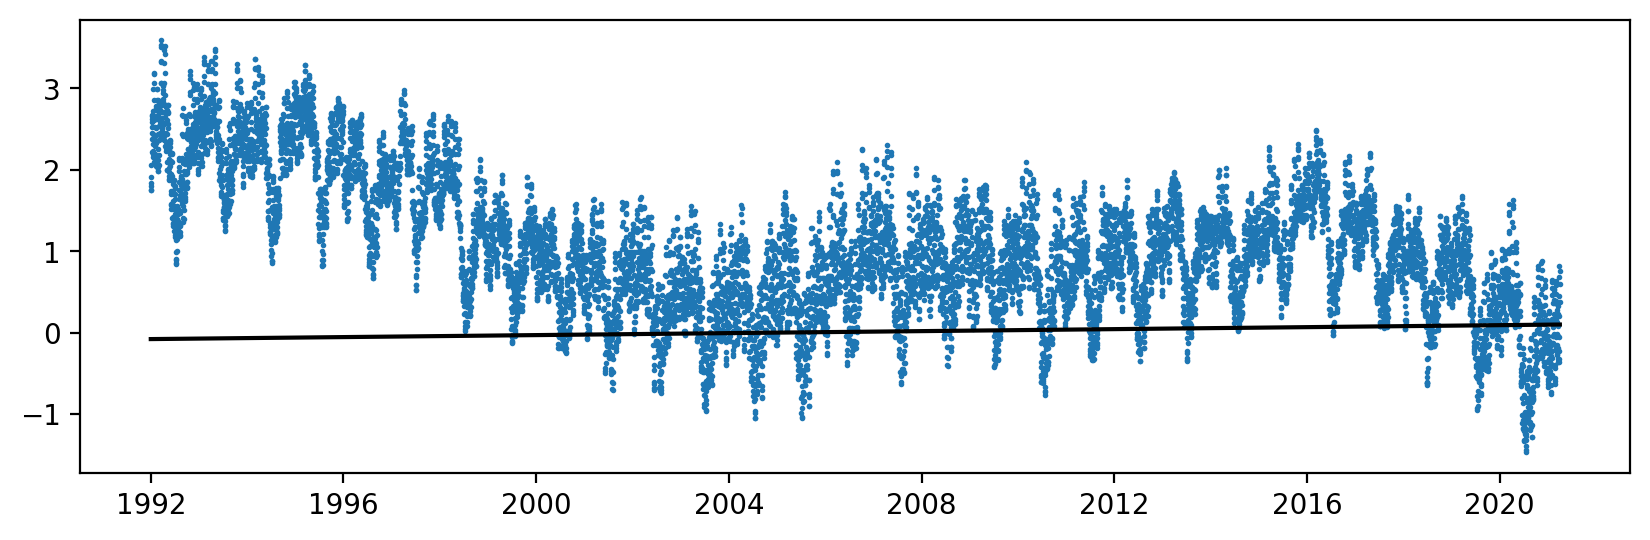

In [18]:
model = LinearRegression()
x = np.arange(1,len(t)+1).reshape(-1, 1)
y = dx

model.fit(x,y)
y_predict = model.predict(x)
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t,lod, s=1)
plt.plot(t, y_predict, '-k')

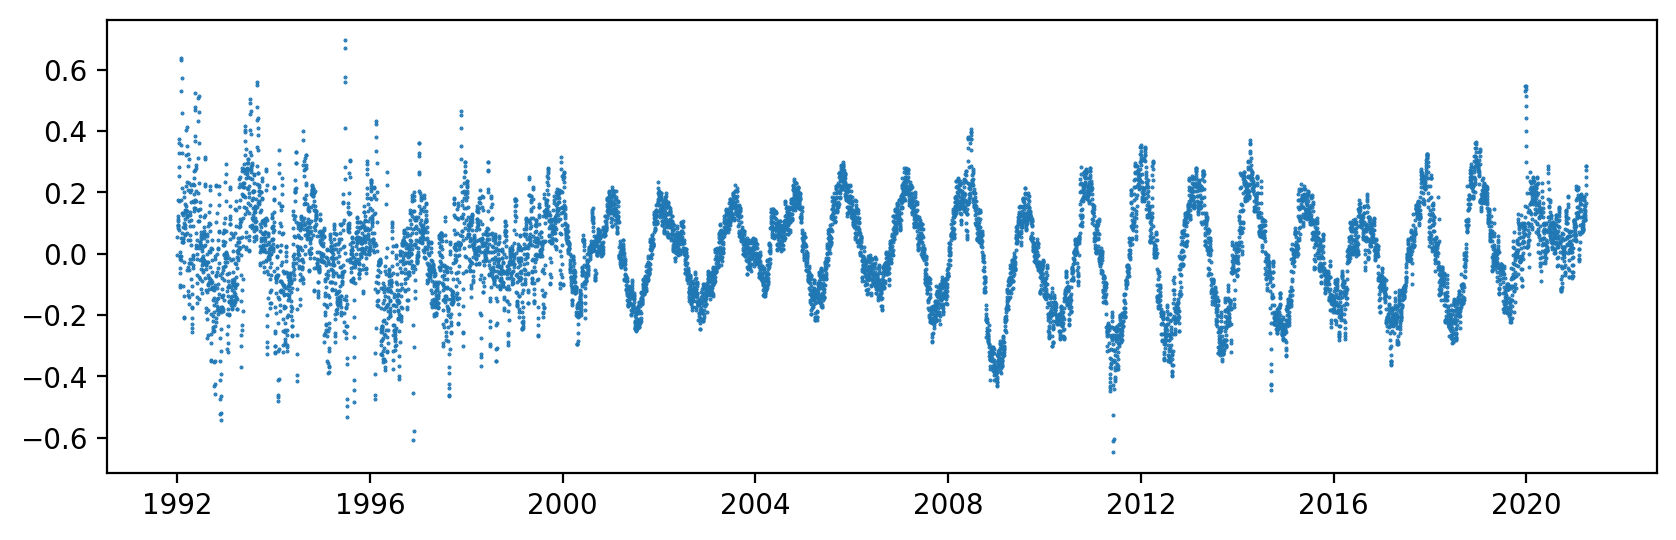

In [19]:
value = (y - y_predict)
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t, value, s = 0.2)

(0.03, 0.08)

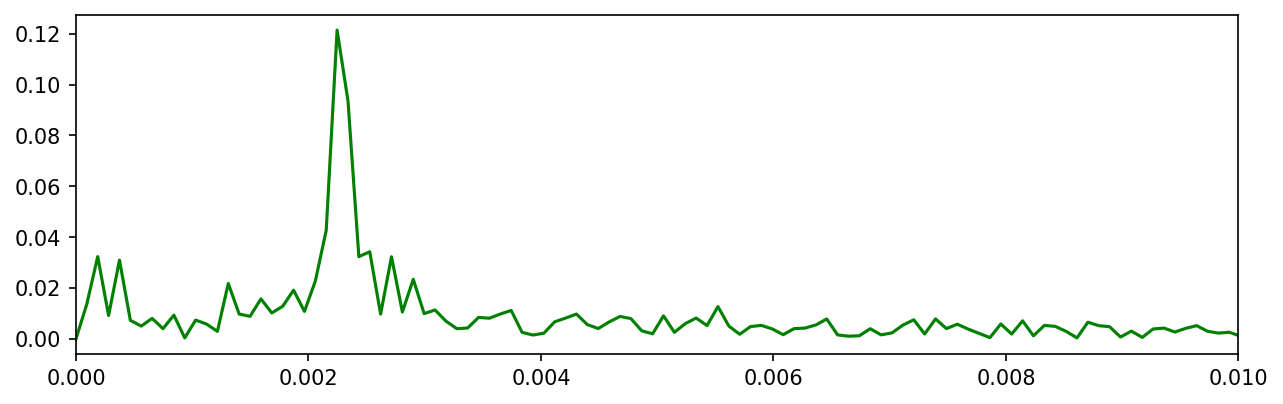

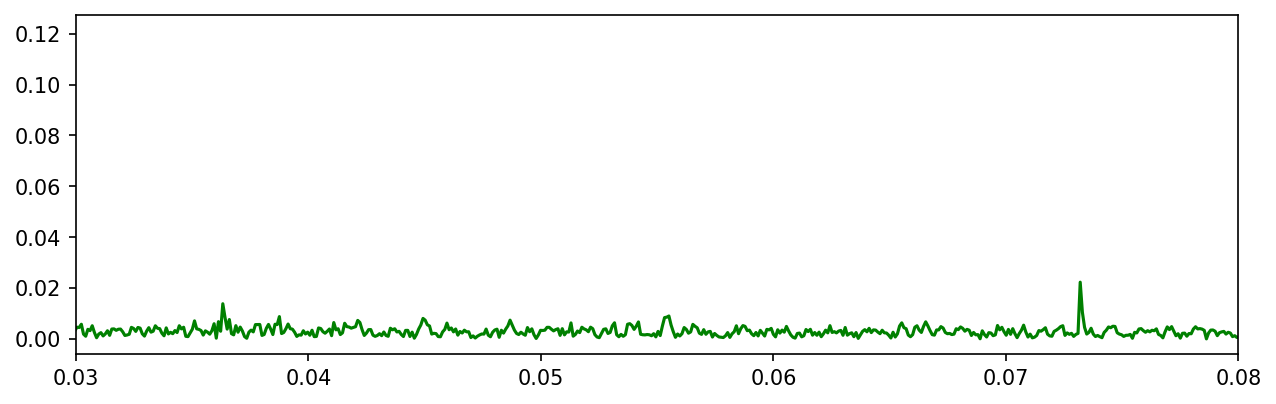

In [20]:
samples = len(y)
dt = 1 #day
f_trans = 2*abs(fft.rfft(value, axis = 0)) / samples
freq = fft.rfftfreq(len(value), dt)

fig = plt.figure(figsize=(10,3), dpi=150)
plt.plot(freq, f_trans, 'g')
plt.xlim(0, 0.01)

fig = plt.figure(figsize=(10,3), dpi=150)
plt.plot(freq, f_trans, 'g')
plt.xlim(0.03, 0.08)

In [21]:
import numpy as np
import pandas as pd
import datetime
from sklearn import linear_model

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)
index = pd.date_range(start, end)
index, len(index)

(DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
                '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                '2020-01-09', '2020-01-10',
                ...
                '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
                '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
                '2020-12-30', '2020-12-31'],
               dtype='datetime64[ns]', length=366, freq='D'),
 366)

In [22]:
multiple = 5
l = list(range(0, len(index)*multiple, multiple))
df = pd.DataFrame(l, index = index)
df.index.name = "date"
df.columns = ["value"]
df

,value
date,
2020-01-01,0
2020-01-02,5
2020-01-03,10
2020-01-04,15
2020-01-05,20
...,...
2020-12-27,1805
2020-12-28,1810
2020-12-29,1815


In [23]:
df['days_from_start'] = (df.index - df.index[0]).days; df

,value,days_from_start
date,,
2020-01-01,0,0
2020-01-02,5,1
2020-01-03,10,2
2020-01-04,15,3
2020-01-05,20,4
...,...,...
2020-12-27,1805,361
2020-12-28,1810,362
2020-12-29,1815,363


In [24]:
x = df['days_from_start'].values.reshape(-1, 1)
y = df['value'].values

In [25]:
model = linear_model.LinearRegression().fit(x, y)
linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model.predict([[1], [7], [50]])

array([  5.,  35., 250.])

In [26]:
from datetime import datetime

t_start = datetime(1992,1,1)
t_stop = datetime(2021,4,2)
delta = t_stop-t_start
delta.seconds 

0